# 第 1 章 — Introduction（導論）

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/nsysu-math524/blob/main/static_files/presentations/Ch01-lab-zh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/nsysu-math524/blob/main/static_files/presentations/Ch01-lab-zh.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

我們需要安裝 `ISLP` 套件，此套件提供我們所使用的資料集與自訂函式的存取功能。
在 macOS 或 Linux 終端機中輸入 `pip install ISLP`；這也會安裝在實驗中所需的其他大部分套件。Python 資源頁面上有 `ISLP` 說明文件網站的連結。

如果我們使用的是 Windows，可以透過「開始選單」存取 `Anaconda`，並依照連結指示進行。例如，要安裝 `ISLP` 並執行此實驗，您可以在 `Anaconda` shell 中執行上述相同的程式碼。

In [ ]:
%pip install ISLP

In [1]:
%load_ext cudf.pandas
%load_ext cuml.accel

cuML: Accelerator installed.


In [64]:
# 本 Notebook 使用的匯入（imports）
import os  # 檔案與環境變數/路徑處理
import numpy as np  # 數值運算與陣列處理
import pandas as pd  # 資料表格與資料處理
import matplotlib as mpl  # Matplotlib 設定與後端
import matplotlib.pyplot as plt  # 繪圖指令與樣式
import seaborn as sns  # 統計視覺化
from sklearn.preprocessing import scale  # 特徵標準化
from sklearn.decomposition import PCA  # 主成分分析 (PCA)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # 二次判別分析 (QDA)
from ISLP import load_data # ISLP 書籍資料集載入
try:
    from google.colab import drive  # Colab：存取 Google Drive
except Exception:
    drive = None  # 非 Colab 環境

## 快速開始（Getting Started）

要執行本書的實驗（labs），你需要兩件事：

* 已安裝的 `Python 3`：本書實驗皆以此版本的 `Python` 執行。
* 能使用 `Jupyter`：常用的 `Python` 互動介面，以 notebook 檔案形式撰寫與執行程式。

你可以前往 [anaconda.com](http://anaconda.com) 依指引下載並安裝 `Python 3`（建議使用 Anaconda 發行版）。

取得 `Jupyter` 的方式很多，以下列出幾個常見選項：

 * 使用 Google 的 `Colaboratory` 服務：[colab.research.google.com/](https://colab.research.google.com/)。
 * 使用 `JupyterHub`：[jupyter.org/hub](https://jupyter.org/hub)。
 * 安裝本機端 `Jupyter`：安裝指引見 [jupyter.org/install](https://jupyter.org/install)。

In [2]:
# Matplotlib 基礎繪圖
%matplotlib inline
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

Python 是通用程式語言，具備豐富的統計套件。當你需要建構結合統計、影像分析、文字探勘或實驗控制等複雜分析流程時，Python 生態系的豐富資源是非常重要的資產。

## pandas（資料處理）

### 建構資料（Constructing data）

可以把 `Series` 想成帶有標籤（label）的陣列。以下示範：傳入一串值建立 `Series`，並讓 pandas 自動建立預設的整數索引：


In [3]:
# NumPy 陣列運算
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


因為我們未指定索引，pandas 會建立從 0 到 N-1（N 為資料長度）的整數索引。實務上經常希望加上能識別每筆資料的索引標籤：


In [4]:
s2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
s2

,0
d,4
b,7
a,-5
c,3


另一種觀點：`Series` 可視為固定長度、具排序的字典（dictionary），將索引值對應到資料值。


In [5]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
s3 = pd.Series(sdata)
s3

,0
Ohio,35000
Texas,71000
Oregon,16000
Utah,5000


接著我們會使用 `pandas.DataFrame` 來儲存與操作資料。它可視為 Python 世界的試算表表格，不同於 2D 的 `NumPy` 陣列，`DataFrame` 具欄名、各欄可容納不同資料型態，並提供完整的索引機制；同時擁有列與欄索引。


In [6]:
# NumPy 陣列運算
dates = pd.date_range("20250901", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2025-09-01,-0.397297,-1.061537,1.455216,0.632237
2025-09-02,-0.840037,-1.592677,-0.604842,-1.500806
2025-09-03,0.501820,-0.662466,0.146713,0.293567
2025-09-04,-1.060077,-1.010073,0.553983,0.211157
2025-09-05,-0.109702,0.236859,-0.203407,0.695861
2025-09-06,0.157943,-0.966041,0.844384,1.641228


補充：`pandas` 對於處理時間序列（time series）也有完善支援。


`pandas.DataFrame` 也可視為由多個一維 `Series`（例如陣列或串列）組成的字典。例如如果我們有三個 `NumPy` 陣列：


In [7]:
# NumPy 陣列運算
t = np.arange(10) #start from 0
sin_t = np.sin(t)
cos_t = np.cos(t)
df2 = pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})
df2

,t,sin,cos
0,0,0.000000,1.000000
1,1,0.841471,0.540302
2,2,0.909297,-0.416147
3,3,0.141120,-0.989992
4,4,-0.756802,-0.653644
5,5,-0.958924,0.283662
6,6,-0.279415,0.960170
7,7,0.656987,0.753902
8,8,0.989358,-0.145500
9,9,0.412118,-0.911130


最常見的建立方式之一，是使用等長度的串列或 `NumPy` 陣列所組成的字典：


In [8]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


建立完成後，各欄位可能擁有不同的 `dtype`（資料型態）。


In [9]:
frame.dtypes

,0
state,object
year,int64
pop,float64


### 檢視資料（Viewing data）

`head/tail/info` 方法與 `dtypes` 屬性適合做初步檢查。`head()` 與 `tail()` 可分別查看前幾列與後幾列：


In [10]:
# 檢視資料基本資訊/摘要
df.head() # Get the first 5 rows of data

,A,B,C,D
2025-09-01,-0.397297,-1.061537,1.455216,0.632237
2025-09-02,-0.840037,-1.592677,-0.604842,-1.500806
2025-09-03,0.501820,-0.662466,0.146713,0.293567
2025-09-04,-1.060077,-1.010073,0.553983,0.211157
2025-09-05,-0.109702,0.236859,-0.203407,0.695861


In [11]:
df.tail(3) # Get the last 3 rows of data

,A,B,C,D
2025-09-04,-1.060077,-1.010073,0.553983,0.211157
2025-09-05,-0.109702,0.236859,-0.203407,0.695861
2025-09-06,0.157943,-0.966041,0.844384,1.641228


In [12]:
df.index # Both the index and columns are array-like object that belongs to pd.Index

DatetimeIndex(['2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04',
               '2025-09-05', '2025-09-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`describe()` 可提供快速的統計摘要：


In [14]:
# 檢視資料基本資訊/摘要
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.291225,-0.842656,0.365341,0.328874
std,0.594509,0.608525,0.743696,1.030710
min,-1.060077,-1.592677,-0.604842,-1.500806
25%,-0.729352,-1.048671,-0.115877,0.231760
50%,-0.253499,-0.988057,0.350348,0.462902
75%,0.091032,-0.738359,0.771784,0.679955
max,0.501820,0.236859,1.455216,1.641228


In [15]:
# 檢視資料基本資訊/摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2025-09-01 to 2025-09-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [16]:
df.shape

(6, 4)

依軸（axis）排序：


In [17]:
# 排序/重建索引
df.sort_index(axis=1, ascending=False) # Sorting by columns in descending order

,D,C,B,A
2025-09-01,0.632237,1.455216,-1.061537,-0.397297
2025-09-02,-1.500806,-0.604842,-1.592677,-0.840037
2025-09-03,0.293567,0.146713,-0.662466,0.501820
2025-09-04,0.211157,0.553983,-1.010073,-1.060077
2025-09-05,0.695861,-0.203407,0.236859,-0.109702
2025-09-06,1.641228,0.844384,-0.966041,0.157943


依欄值排序：


In [18]:
# 排序/重建索引
df.sort_values(by="B")

,A,B,C,D
2025-09-02,-0.840037,-1.592677,-0.604842,-1.500806
2025-09-01,-0.397297,-1.061537,1.455216,0.632237
2025-09-04,-1.060077,-1.010073,0.553983,0.211157
2025-09-06,0.157943,-0.966041,0.844384,1.641228
2025-09-03,0.501820,-0.662466,0.146713,0.293567
2025-09-05,-0.109702,0.236859,-0.203407,0.695861


### 選取資料（Selecting data）

選取單一欄位（會得到 `Series`），等同於 `df.A`：


In [19]:
df["A"]

,A
2025-09-01,-0.397297
2025-09-02,-0.840037
2025-09-03,0.501820
2025-09-04,-1.060077
2025-09-05,-0.109702
2025-09-06,0.157943


使用 slicing（切片）選取列資料。


In [20]:
df[0:3] # df["20250901":"20250903"] also works

,A,B,C,D
2025-09-01,-0.397297,-1.061537,1.455216,0.632237
2025-09-02,-0.840037,-1.592677,-0.604842,-1.500806
2025-09-03,0.501820,-0.662466,0.146713,0.293567


選取資料建議使用 `loc`（依標籤）或 `iloc`（依位置）。


依標籤選取欄或列


In [21]:
# 欄位選取與資料清理/轉換
df.loc[:, ["A", "C"]] # Fancy indexing in the second dimension

,A,C
2025-09-01,-0.397297,1.455216
2025-09-02,-0.840037,-0.604842
2025-09-03,0.501820,0.146713
2025-09-04,-1.060077,0.553983
2025-09-05,-0.109702,-0.203407
2025-09-06,0.157943,0.844384


In [22]:
# 欄位選取與資料清理/轉換
df.loc["20250901":"20250904","A":"C"] # Note that 20250904 and C are included!

,A,B,C
2025-09-01,-0.397297,-1.061537,1.455216
2025-09-02,-0.840037,-1.592677,-0.604842
2025-09-03,0.501820,-0.662466,0.146713
2025-09-04,-1.060077,-1.010073,0.553983


依位置選取（類似 `NumPy` 與 `Python`）


In [23]:
# 欄位選取與資料清理/轉換
df.iloc[3]

,2025-09-04
A,-1.060077
B,-1.010073
C,0.553983
D,0.211157


In [24]:
# 欄位選取與資料清理/轉換
df.iloc[3:5, 0:2] # Note that the 5 row and 2 column are excluded!

,A,B
2025-09-04,-1.060077,-1.010073
2025-09-05,-0.109702,0.236859


布林（fancy）索引


In [25]:
df[df["A"] > 0]

,A,B,C,D
2025-09-03,0.501820,-0.662466,0.146713,0.293567
2025-09-06,0.157943,-0.966041,0.844384,1.641228


透過將運算結果指派到 `DataFrame` 的新欄名（放在 `[]` 內）來建立新欄位。


In [26]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"] # Same length with other Series
df2

,A,B,C,D,E
2025-09-01,-0.397297,-1.061537,1.455216,0.632237,one
2025-09-02,-0.840037,-1.592677,-0.604842,-1.500806,one
2025-09-03,0.501820,-0.662466,0.146713,0.293567,two
2025-09-04,-1.060077,-1.010073,0.553983,0.211157,three
2025-09-05,-0.109702,0.236859,-0.203407,0.695861,four
2025-09-06,0.157943,-0.966041,0.844384,1.641228,three


`pandas` 物件的重要方法之一是 `reindex()`：建立一個按照新索引重排值的新物件。


In [27]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj

,0
d,4.5
b,7.2
a,-5.3
c,3.6


In [28]:
# 欄位選取與資料清理/轉換；排序/重建索引
obj2 = obj.reindex(["a", "b", "c", "d", "e"]) # Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.
obj2  # pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. Check dropna(), fillna() and isna()

,0
a,-5.3
b,7.2
c,3.6
d,4.5
e,NaN


### 資料運算（Computations）


彙總（reduction）操作與 `NumPy` 陣列用法相同：


In [29]:
df.mean()

,0
A,-0.291225
B,-0.842656
C,0.365341
D,0.328874


二元運算子會以 element-wise（逐元素）方式作用，且支援 broadcasting。


In [30]:
df2 = df.copy()
df2 + df

,A,B,C,D
2025-09-01,-0.794593,-2.123075,2.910432,1.264474
2025-09-02,-1.680074,-3.185354,-1.209683,-3.001613
2025-09-03,1.003641,-1.324931,0.293426,0.587134
2025-09-04,-2.120153,-2.020146,1.107965,0.422315
2025-09-05,-0.219403,0.473718,-0.406813,1.391721
2025-09-06,0.315886,-1.932082,1.688768,3.282456


也可以套用其他 `NumPy` 方法：


In [31]:
# NumPy 陣列運算
df.apply(np.cumsum)

,A,B,C,D
2025-09-01,-0.397297,-1.061537,1.455216,0.632237
2025-09-02,-1.237333,-2.654214,0.850374,-0.868569
2025-09-03,-0.735513,-3.316680,0.997087,-0.575002
2025-09-04,-1.795590,-4.326753,1.551070,-0.363845
2025-09-05,-1.905291,-4.089894,1.347664,0.332016
2025-09-06,-1.747348,-5.055935,2.192048,1.973244


### 合併與分組（Merge & Group）


`concat()` 可用於欄/列方向串接多個表格。


In [32]:
pieces = [df[:2], df[2:4], df[4:]]
pieces, type(pieces[0])

([                   A         B         C         D
  2025-09-01 -0.397297 -1.061537  1.455216  0.632237
  2025-09-02 -0.840037 -1.592677 -0.604842 -1.500806,
                     A         B         C         D
  2025-09-03  0.501820 -0.662466  0.146713  0.293567
  2025-09-04 -1.060077 -1.010073  0.553983  0.211157,
                     A         B         C         D
  2025-09-05 -0.109702  0.236859 -0.203407  0.695861
  2025-09-06  0.157943 -0.966041  0.844384  1.641228],
 pandas.core.frame.DataFrame)

In [33]:
# 資料表合併/串接
pd.concat(pieces) # Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive.

,A,B,C,D
2025-09-01,-0.397297,-1.061537,1.455216,0.632237
2025-09-02,-0.840037,-1.592677,-0.604842,-1.500806
2025-09-03,0.501820,-0.662466,0.146713,0.293567
2025-09-04,-1.060077,-1.010073,0.553983,0.211157
2025-09-05,-0.109702,0.236859,-0.203407,0.695861
2025-09-06,0.157943,-0.966041,0.844384,1.641228


若要進行類似資料庫的合併/連接，請使用 `merge()`。


In [34]:
# NumPy 陣列運算
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.159778,1.824612
1,bar,one,0.632444,0.329870
2,foo,two,-1.354012,-0.837909
3,bar,three,-0.364301,0.853457
4,foo,two,-0.539989,0.866746
5,bar,two,1.478904,1.316012
6,foo,one,-0.871344,1.548436
7,foo,three,-0.134922,-2.700920


`value_counts()` 是快速統計各類別筆數的便利方法。


In [35]:
# 分組彙總/類別計數
df['A'].value_counts()

,count
A,
foo,5
bar,3


`groupby()` 提供 split-apply-combine 的強大能力：先分組（split），再套用函式（apply），最後合併（combine）。


In [36]:
# 分組彙總/類別計數
df.groupby("A").sum(numeric_only=True)

,C,D
A,,
bar,1.747047,2.499340
foo,-2.740490,0.700964


### [I/O](https://pandas.pydata.org/docs/user_guide/io.html#io)

以 `read_*` 家族函式，能從多種檔案格式或資料來源將資料讀入 pandas。

以 `to_*` 家族方法，能將 pandas 物件輸出為各種格式。


In [37]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [38]:
df.to_csv("foo.csv")

更多資訊請參考 [https://wesmckinney.com/book/pandas-basics.html](https://wesmckinney.com/book/pandas-basics.html) 和 [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)。

## seaborn（統計視覺化）

統計分析在於理解資料集中變數之間的關係，以及這些關係如何受其他變數影響；視覺化是此過程的重要工具。


seaborn 是用於建立**統計視覺化**的 Python 套件；它建構於 `matplotlib` 之上，並與 `pandas` 的資料結構**緊密整合**。


範例 `tips` 資料集（Kaggle 連結如下）：https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset


In [39]:
# 檢視資料基本資訊/摘要；載入範例資料集
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 散佈圖（Scatter plot）


散佈圖是統計視覺化的基石：以點雲呈現兩個變數的聯合分布，每個點代表一筆觀測值。


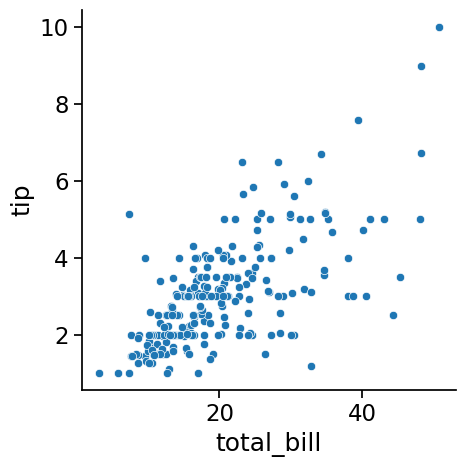

In [40]:
# Scatterplot
sns.relplot(x="total_bill", y="tip", data=tips); # Semicolon is intended to suppress text representation

在二維散佈圖上，可再條件化第三個變數以呈現更多維度；在 seaborn 中常用 hue/style/size 等語意。


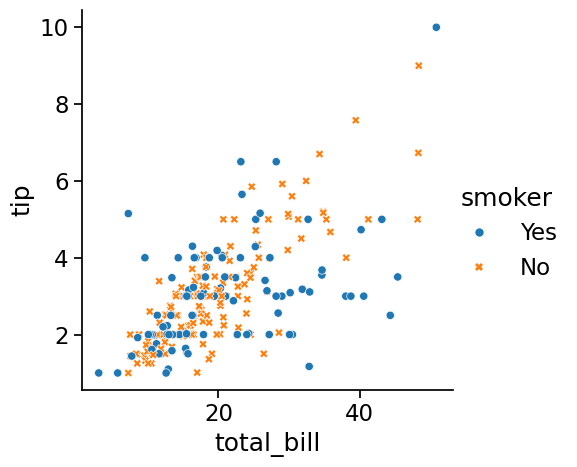

In [41]:
# 載入範例資料集
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips); # you can use a different marker style for each class

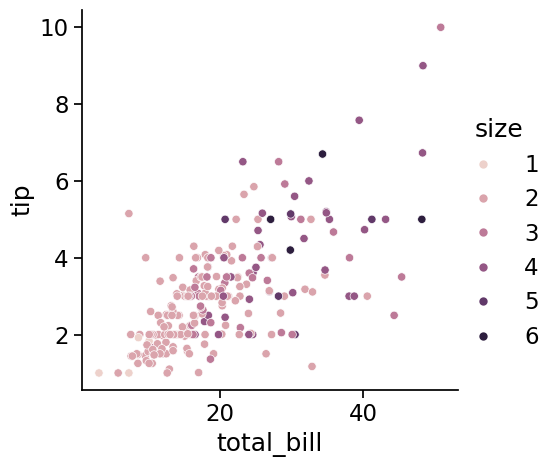

In [42]:
# 載入範例資料集
sns.relplot(x="total_bill", y="tip", hue="size", data=tips); #if hue is numeric rather than categorical

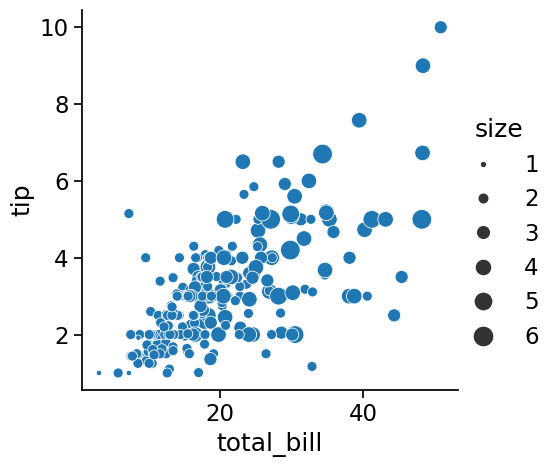

In [43]:
# 載入範例資料集
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips); #size rather than colors

也可透過 `row` 與 `col` 參數產生 small multiples（小多格）圖。


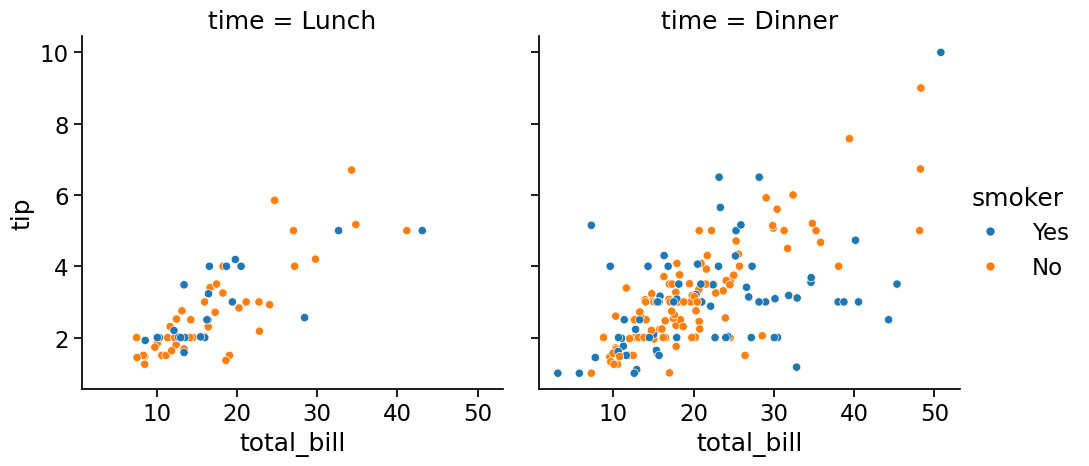

In [44]:
# 載入範例資料集
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips); #show in different subplot

### 折線圖（Line plot）


在部分資料集中，我們想了解某變數隨時間或其他連續變數的變化；此時折線圖能強調連續性。


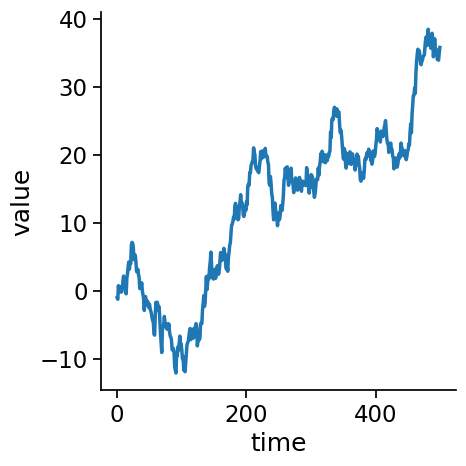

In [45]:
# NumPy 陣列運算
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df); # A convenient kind parameter that lets you easily switch to line plot

較複雜的資料集在相同 x 值下可能有多筆量測；seaborn 會彙整（平均）並以 bootstrap 計算 95% 信賴區間。


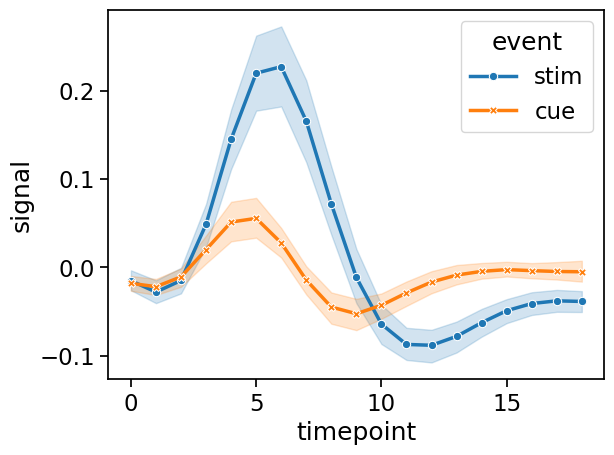

In [46]:
# 載入範例資料集；Seaborn 視覺化：折線圖
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", markers=True, dashes=False, data=fmri);

### 直方圖（histplot）


在分析或建模前，應先了解**變數的分布**：如範圍、集中趨勢、偏態、雙峰、離群值，並觀察在子集合中是否有所差異。


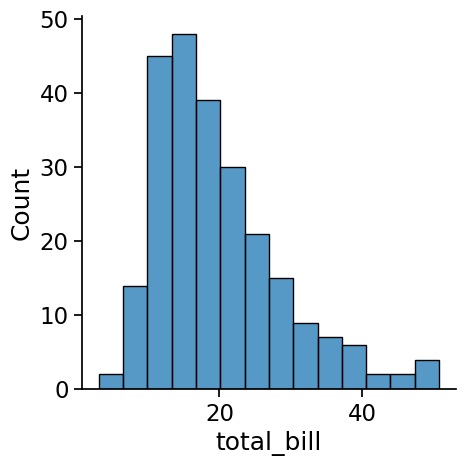

In [47]:
# 載入範例資料集
sns.displot(x="total_bill", data = tips); #check parameter bins and binwidth

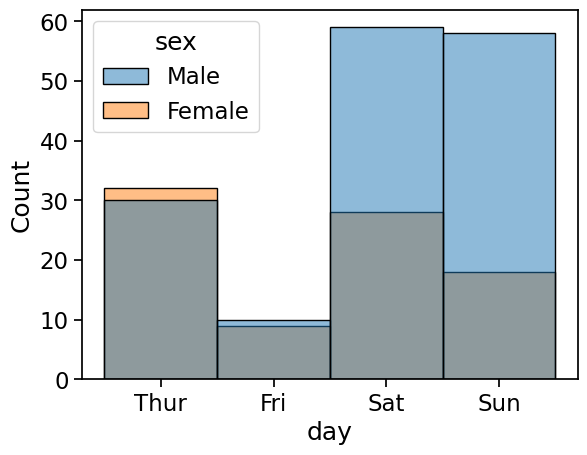

In [48]:
# 載入範例資料集；Seaborn 視覺化：直方圖
sns.histplot(data=tips, x="day", hue="sex"); # By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish.

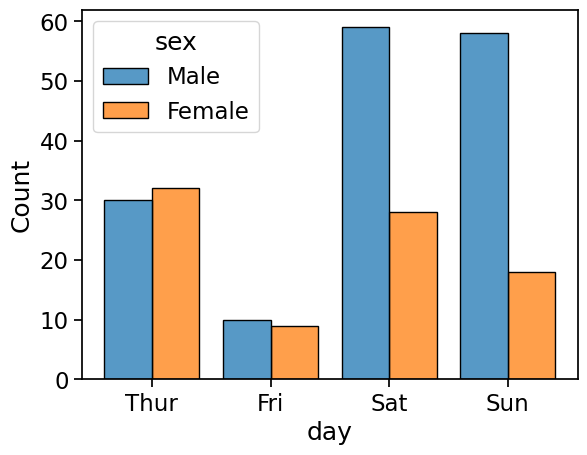

In [49]:
# 載入範例資料集；Seaborn 視覺化：直方圖
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8);

### KDE 密度圖（kdeplot）


Kernel Density Estimation（KDE）提供與直方圖不同的分布估計方式：以 Gaussian kernel 平滑觀測值，得到連續的密度函數。


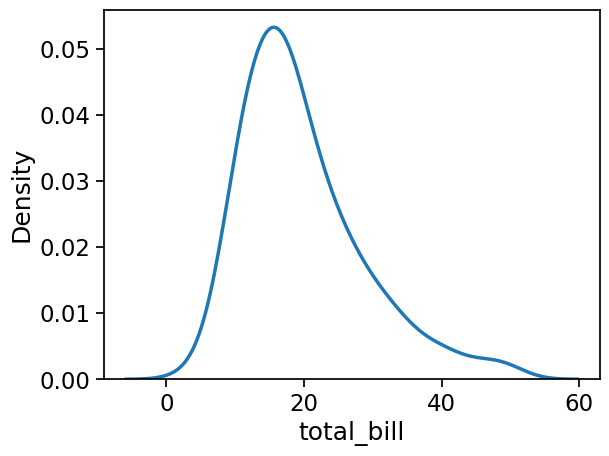

In [50]:
# 載入範例資料集；Seaborn 視覺化：KDE 密度圖
sns.kdeplot(data=tips, x="total_bill");

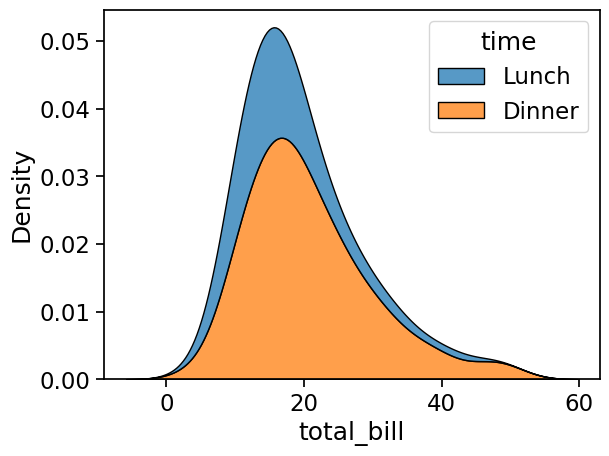

In [51]:
# 載入範例資料集；Seaborn 視覺化：KDE 密度圖
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack");

### Joint 分布圖（jointplot）


`jointplot()` 在雙變數圖形上加上兩側的邊際分布，常見主圖為 `scatterplot()`、邊際為 `histplot()`。


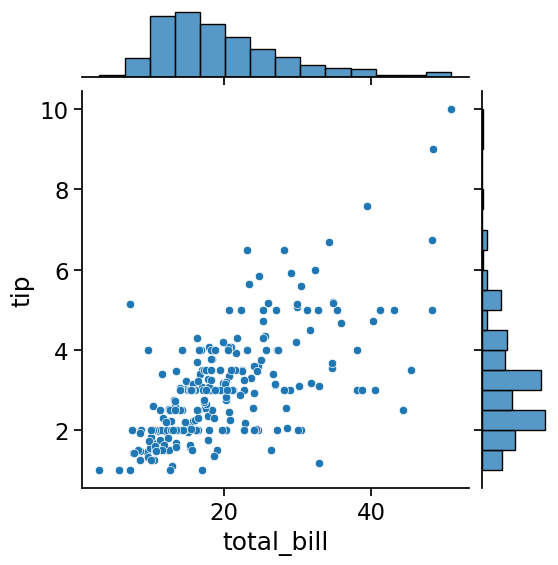

In [52]:
# 載入範例資料集；Seaborn 視覺化：Joint 分布圖
sns.jointplot(x="total_bill", y="tip", data=tips);

### 成對關係圖（pairplot）


`pairplot()` 以小多格方式同時呈現資料集中各變數的單變量分布與成對關係。


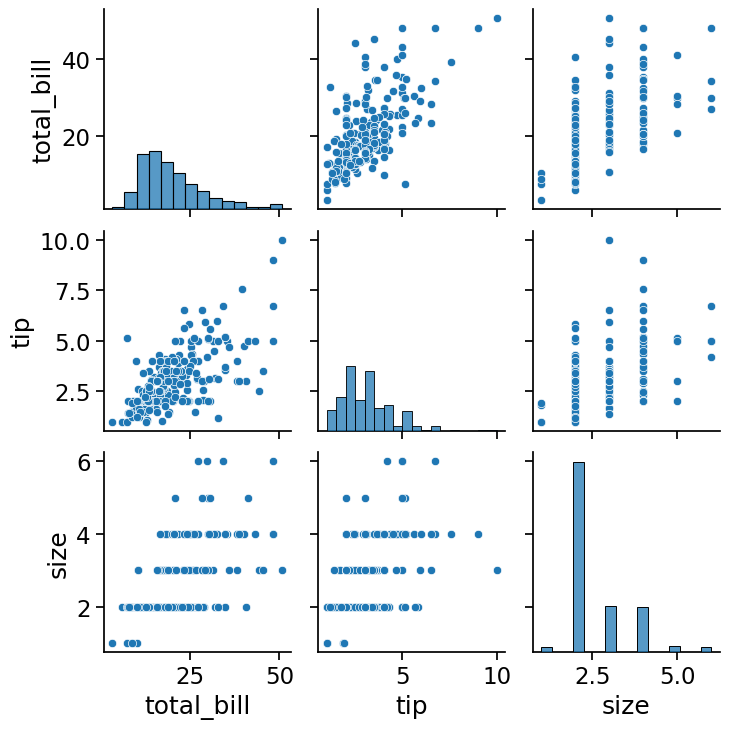

In [53]:
# 載入範例資料集；Seaborn 視覺化：變數成對關係圖
sns.pairplot(tips);

### 盒鬚圖（boxplot）

當資料集變大時，類別散佈圖較難呈現**分布**的細節，此時可改用更適合比較各類別分布的圖形（如 boxplot）。


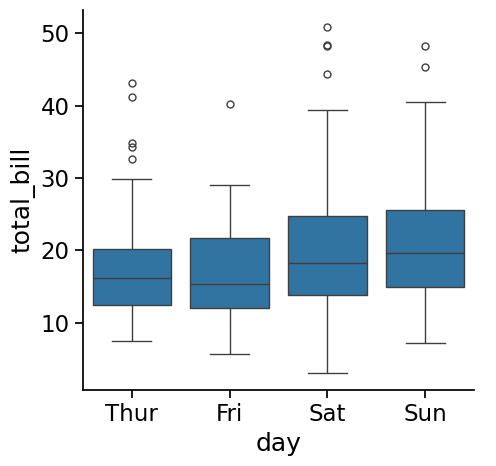

In [54]:
# 載入範例資料集
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

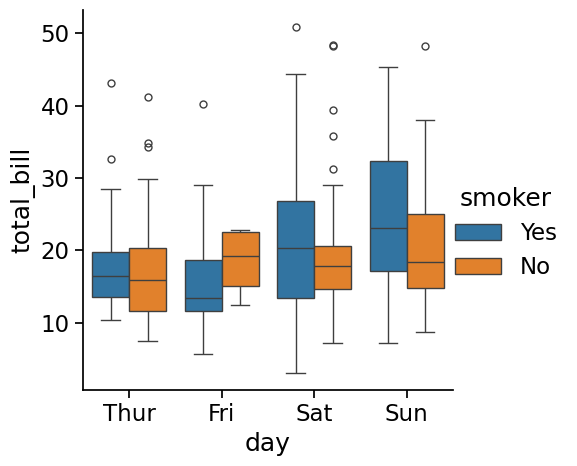

In [55]:
# 載入範例資料集
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips); # When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:b

### 長條圖（barplot）


若目標是呈現各類別的**集中趨勢**，`barplot()` 會對完整資料操作聚合函式（預設平均），並以誤差線呈現信賴區間（由 bootstrap 計算）。


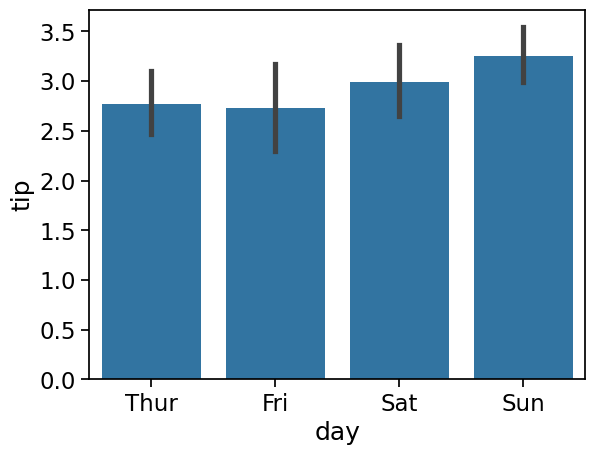

In [56]:
# 載入範例資料集；Seaborn 視覺化：長條圖
ax = sns.barplot(x="day", y="tip", data=tips);

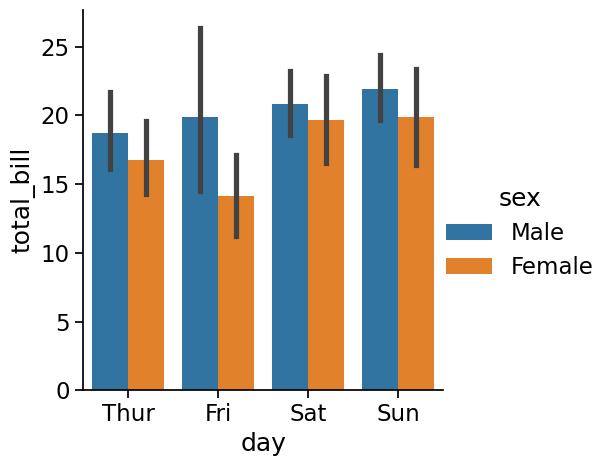

In [57]:
# 載入範例資料集
sns.catplot(x="day", y="total_bill", hue="sex", kind="bar", data=tips);

### 計數圖（countplot）


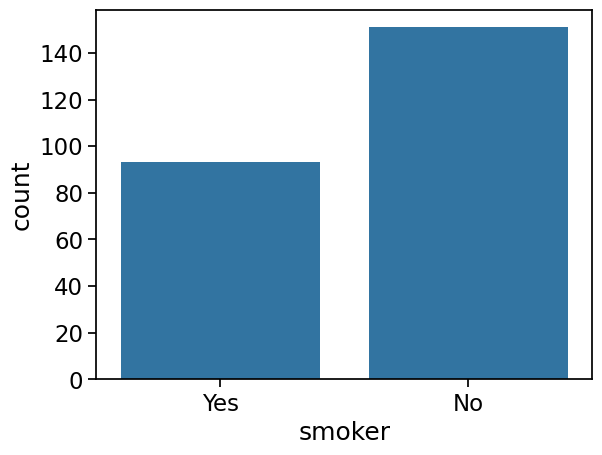

In [58]:
# 載入範例資料集；Seaborn 視覺化：計數長條圖
sns.countplot(x="smoker", data=tips); #simply count the number

### 點估計圖（pointplot）


此圖以點的高度呈現估計值及其信賴區間，而非整個長條。


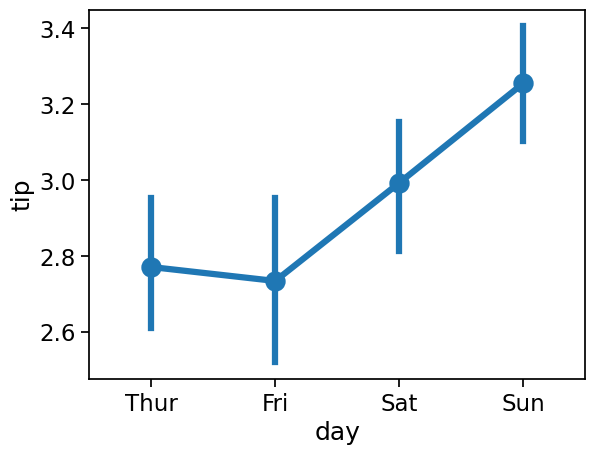

In [59]:
# 載入範例資料集；Seaborn 視覺化：點估計圖
sns.pointplot(x="day", y="tip", data=tips, errorbar=('ci', 68));

### regplot / lmplot (迴歸分析圖)


依據 Tukey 的精神，seaborn 中的迴歸圖著重於在探索時提供視覺引導，強調資料中的趨勢；讓視覺化與統計表格同等重要。


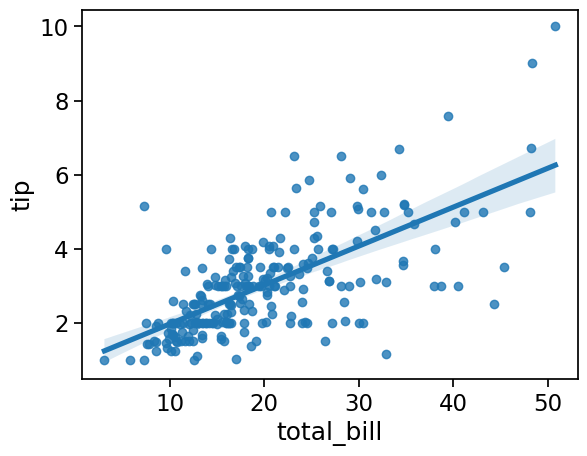

In [60]:
# 載入範例資料集；Seaborn 視覺化：迴歸散佈圖
sns.regplot(x="total_bill", y="tip", data=tips);

當 y 為二元變數時，簡單線性迴歸雖可擬合但預測不合理，應改用 Logistic Regression，使迴歸線表達 y=1 的機率隨 x 的變化。


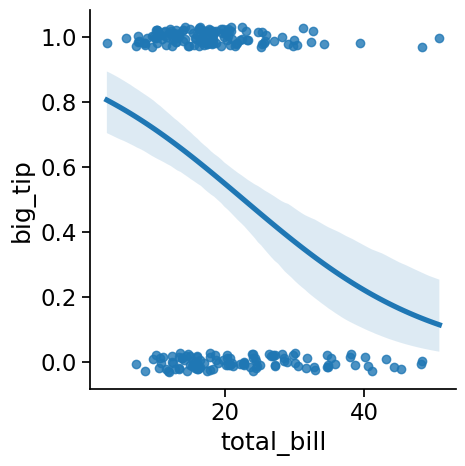

In [61]:
# 載入範例資料集；Seaborn 視覺化：迴歸關係圖
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

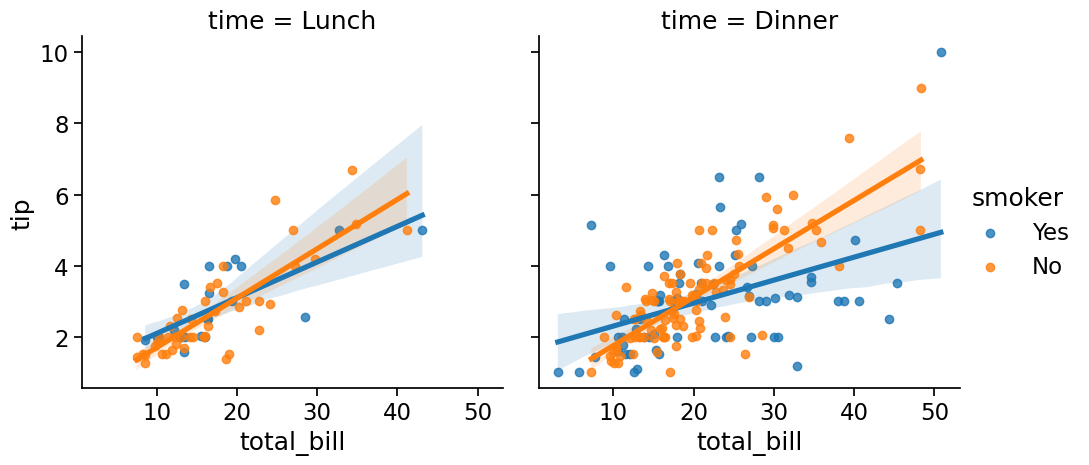

In [62]:
# 載入範例資料集；Seaborn 視覺化：迴歸關係圖
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

### 熱圖（heatmap）

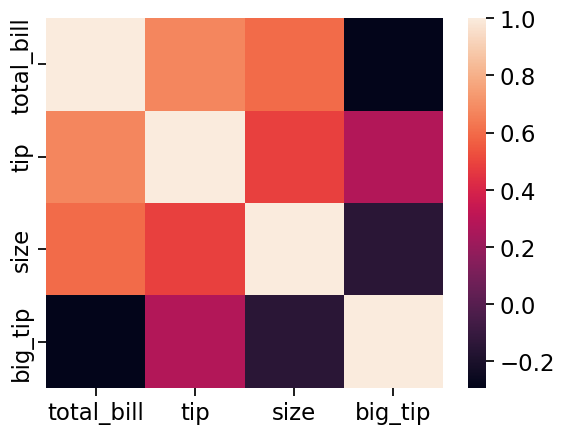

In [63]:
# 相關係數/相關矩陣；載入範例資料集
corr = tips.corr(numeric_only=True)
sns.heatmap(corr);

更多自訂範例參見 seaborn 官方教學與 API 文件。


## 實驗一：載入資料集與前處理（Lab 1）

<center><img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg"></center>

<div align="center"> source: https://stackoverflow.com/questions/2354725/what-exactly-is-llvm </div>

可於官方網站下載各資料集： https://www.statlearning.com/resources-python 。


In [ ]:
# Colab 掛載 Google Drive
drive.mount('/content/drive')

### The [Wage](https://intro-stat-learning.github.io/ISLP/datasets/Wage.html) 資料集

In [65]:
Wage = load_data('Wage')
Wage.head(3)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [66]:
Wage.shape, Wage.columns

((3000, 11),
 Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
        'health', 'health_ins', 'logwage', 'wage'],
       dtype='object'))

In [67]:
# 檢視資料基本資訊/摘要
Wage.info(), Wage.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   int64   
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(7), float64(2), int64(2)
memory usage: 115.5 KB


(None,
               year          age      logwage         wage
 count  3000.000000  3000.000000  3000.000000  3000.000000
 mean   2005.791000    42.414667     4.653905   111.703608
 std       2.026167    11.542406     0.351753    41.728595
 min    2003.000000    18.000000     3.000000    20.085537
 25%    2004.000000    33.750000     4.447158    85.383940
 50%    2006.000000    42.000000     4.653213   104.921507
 75%    2008.000000    51.000000     4.857332   128.680488
 max    2009.000000    80.000000     5.763128   318.342430)

In [68]:
Wage[Wage['year'] == 2004]['wage'].mean()

np.float64(111.15999687022256)

In [69]:
# 分組彙總/類別計數
groupby_year = Wage.groupby('year')
for year, value in groupby_year['wage']:
    print((year, value.mean()))

(2003, np.float64(106.19828382530922))
(2004, np.float64(111.15999687022256))
(2005, np.float64(110.0378573127405))
(2006, np.float64(114.24257930246816))
(2007, np.float64(112.89455609045216))
(2008, np.float64(113.55199949510215))
(2009, np.float64(115.97177059231909))


In [70]:
groupby_year # groupby_year is a powerful object that exposes many operations on the resulting group of dataframes:

seaborn 能在 pandas DataFrame 上套用簡單統計擬合並繪圖。


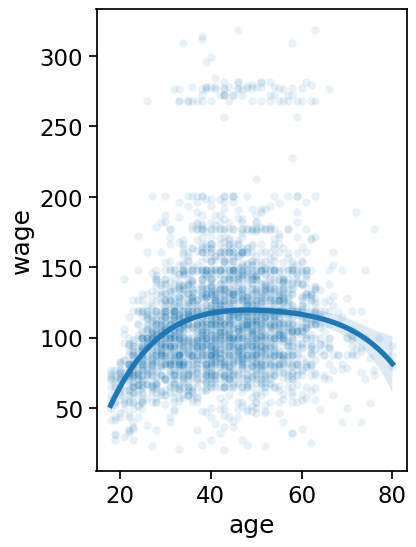

In [71]:
# creating plots
# Scatter plot with polynomial regression line, the regression line is bounded by the data limits. truncate=True.
plt.figure(figsize=(4,6))
sns.scatterplot(x="age", y="wage", data=Wage, alpha=0.1)
sns.regplot(x="age", y="wage", data=Wage, order=4, truncate=True, scatter=False);

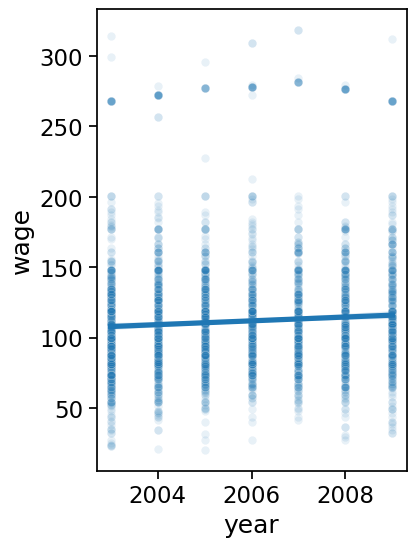

In [72]:
# creating plots
# Scatter plot with polynomial regression line
plt.figure(figsize=(4,6))
sns.scatterplot(x="year", y="wage", data=Wage, alpha=0.1)
sns.regplot(x="year", y="wage", data=Wage, order=1, truncate=True, scatter=False);

In [73]:
print(Wage.education.unique())
originalL = list(Wage.education.unique())
orderL = [originalL[0], originalL[3], originalL[2], originalL[1], originalL[4]]

['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad', '5. Advanced Degree']
Categories (5, object): ['1. < HS Grad' < '2. HS Grad' < '3. Some College' < '4. College Grad' <
                         '5. Advanced Degree']


/tmp/ipython-input-673793685.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([t.get_text().split()[0][0]  for t in ax.get_xticklabels()]);


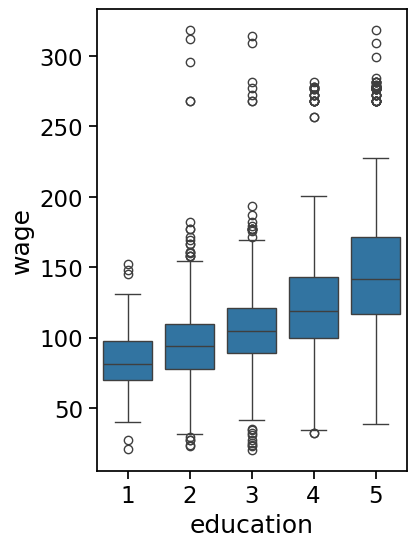

In [74]:
# Matplotlib 基礎繪圖；Seaborn 視覺化：盒鬚圖
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="education", y="wage", data=Wage, order=orderL)
ax.set_xticklabels([t.get_text().split()[0][0]  for t in ax.get_xticklabels()]);

### The [S&P](https://intro-stat-learning.github.io/ISLP/datasets/Smarket.html) 資料集

In [75]:
# 讀取資料到 DataFrame；檢視資料基本資訊/摘要
Smarket = load_data('Smarket')
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [76]:
# 檢視資料基本資訊/摘要
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB


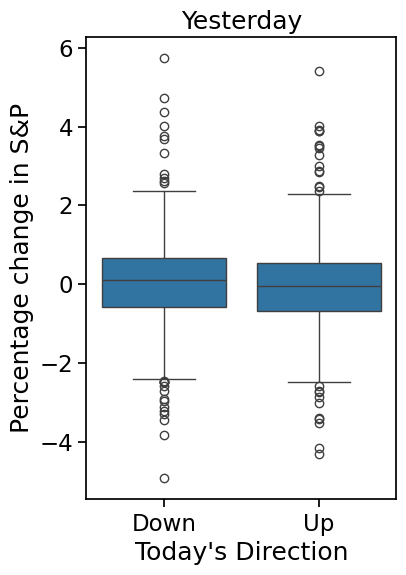

In [77]:
# Matplotlib 基礎繪圖；Seaborn 視覺化：盒鬚圖
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="Direction", y="Lag1", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Yesterday");

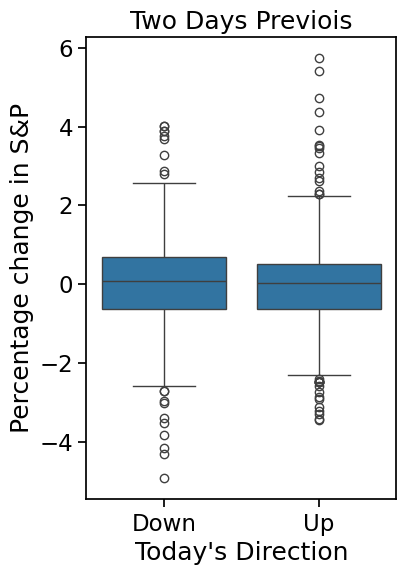

In [78]:
# Matplotlib 基礎繪圖；Seaborn 視覺化：盒鬚圖
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="Direction", y="Lag2", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Two Days Previois");

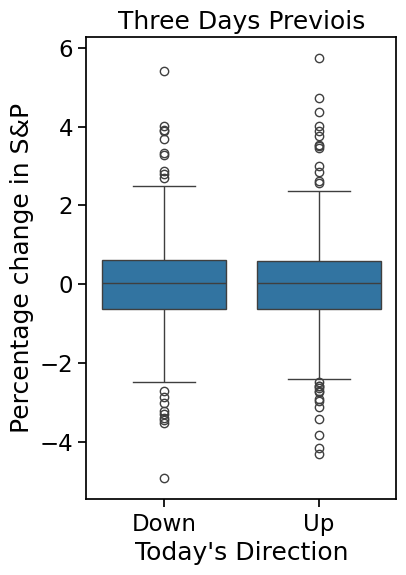

In [79]:
# Matplotlib 基礎繪圖；Seaborn 視覺化：盒鬚圖
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="Direction", y="Lag3", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Three Days Previois");

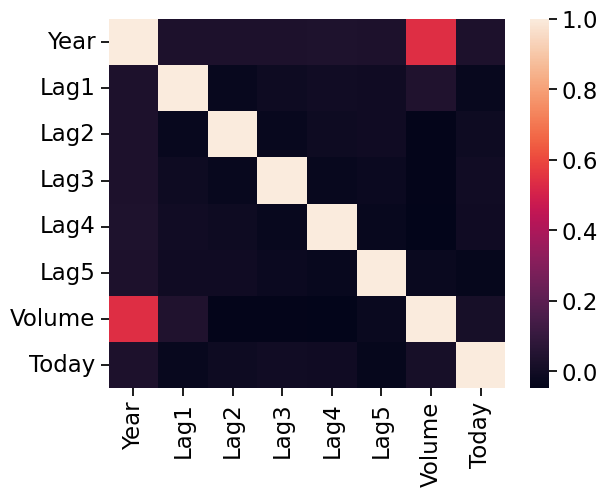

In [80]:
# 相關係數/相關矩陣；Seaborn 視覺化：熱圖
corr = Smarket.corr(numeric_only=True)
sns.heatmap(corr);

### The [NCI 60](https://intro-stat-learning.github.io/ISLP/datasets/NCI60.html) 資料集

In [83]:
# 讀取資料到 DataFrame；檢視資料基本資訊/摘要
NCI60 = load_data('NCI60')
NCI60.keys()

dict_keys(['data', 'labels'])

In [86]:
# 特徵標準化
X = pd.DataFrame(scale(NCI60['data']))
X.shape

(64, 6830)

In [87]:
# 讀取資料到 DataFrame；檔案系統操作
y = NCI60['labels']
y.shape

(64, 1)

In [89]:
# 分組彙總/類別計數
y.value_counts()

,count
label,
RENAL,9
NSCLC,9
MELANOMA,8
BREAST,7
COLON,7
LEUKEMIA,6
OVARIAN,6
CNS,5
PROSTATE,2


In [102]:
y['label']

,label
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST
...,...
59,MELANOMA
60,MELANOMA
61,MELANOMA
62,MELANOMA


In [90]:
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
NCI60_plot = pd.DataFrame(pca2.fit_transform(X))

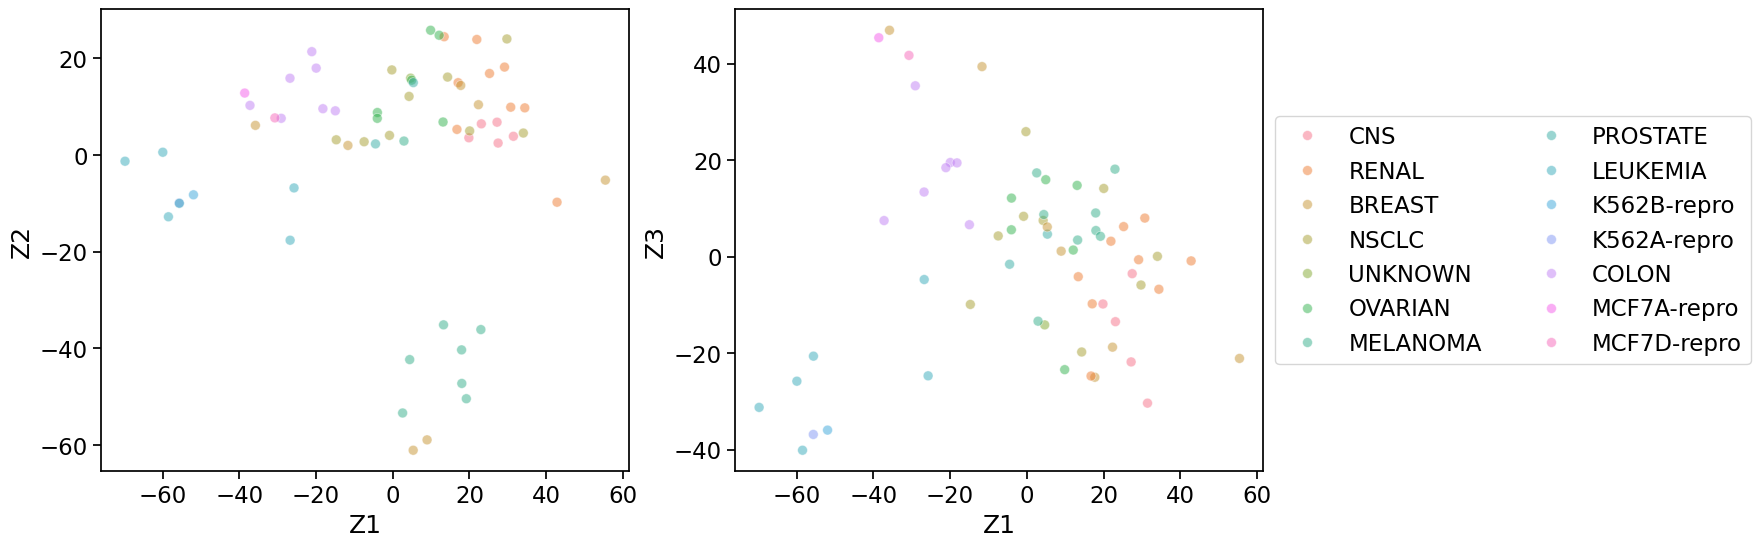

In [104]:
# Matplotlib 基礎繪圖；Seaborn 視覺化：散佈圖
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

# Left plot
sns.scatterplot(x =0, y=-NCI60_plot[1], data=NCI60_plot, hue=y['label'], alpha=0.5, s=50, ax=ax1, legend=False)
ax1.set_xlabel('Z1')
ax1.set_ylabel('Z2')


# Right plot
sns.scatterplot(x = 0, y= 2, data=NCI60_plot, hue=y['label'], alpha=0.5, s=50, ax=ax2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
ax2.set_xlabel('Z1')
ax2.set_ylabel('Z3');

### The [Auto](https://intro-stat-learning.github.io/ISLP/datasets/Auto.html) 資料集

In [105]:
# 讀取資料到 DataFrame；欄位選取與資料清理/轉換
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [106]:
# 檢視資料基本資訊/摘要
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


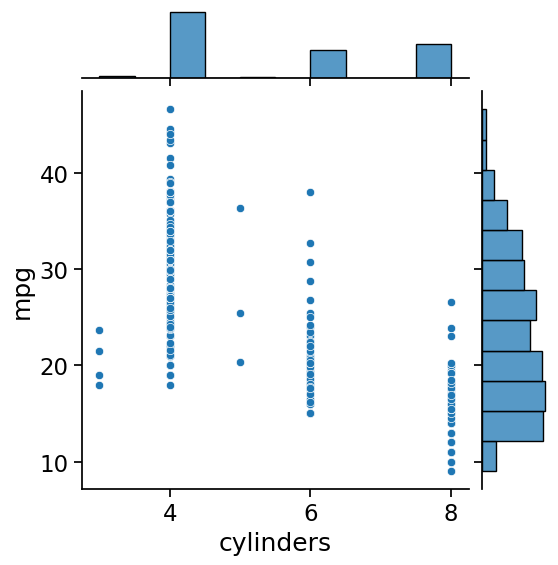

In [107]:
# Seaborn 視覺化：Joint 分布圖
sns.jointplot(x="cylinders", y="mpg", data=Auto);

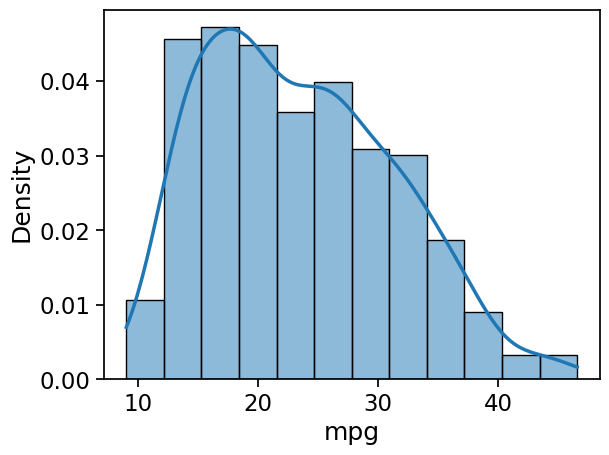

In [108]:
# Seaborn 視覺化：直方圖
sns.histplot(x="mpg", kde=True, stat="density", data = Auto); #check parameter bins and binwidth

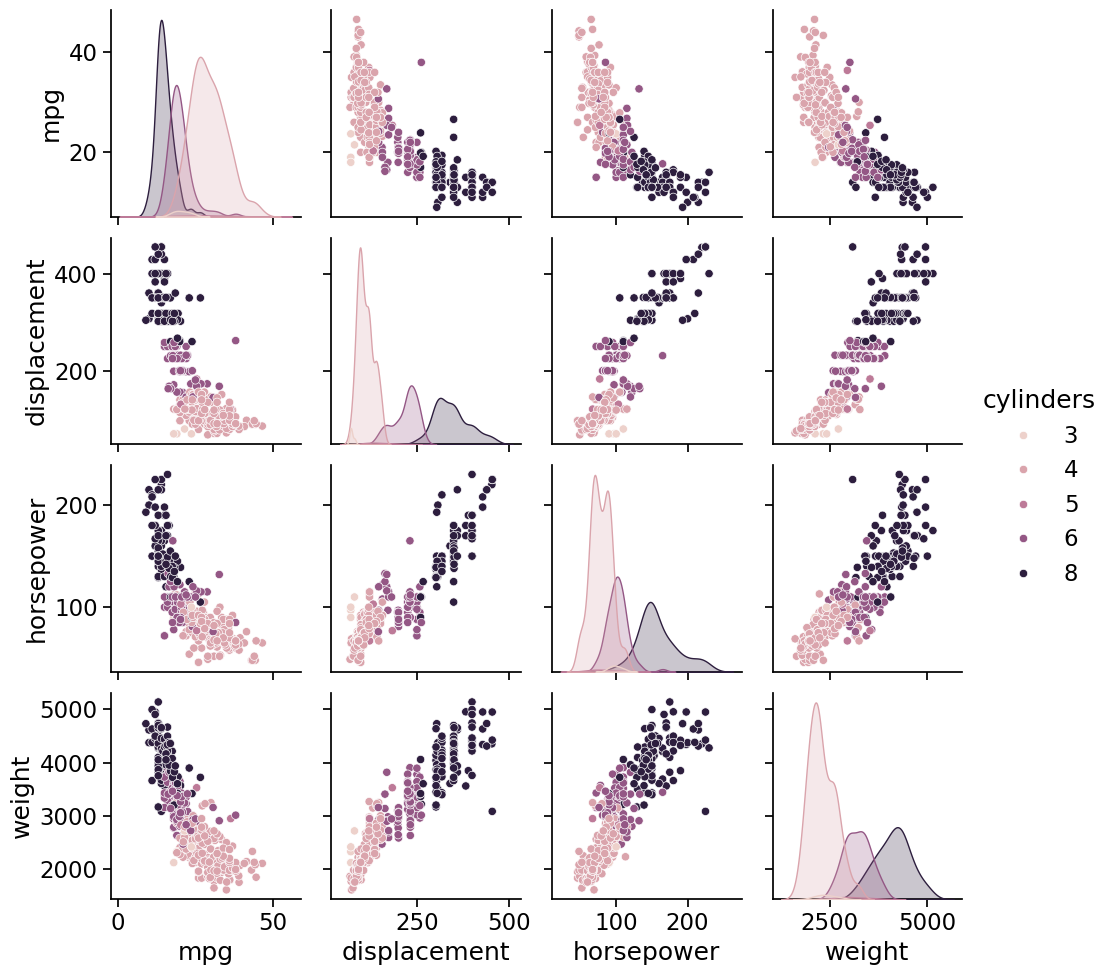

In [109]:
# 欄位選取與資料清理/轉換；Seaborn 視覺化：變數成對關係圖
sns.pairplot(Auto.loc[:,["mpg","displacement", "horsepower", "weight", "cylinders"]], hue="cylinders");

### The [Bikeshare](https://intro-stat-learning.github.io/ISLP/datasets/Bikeshare.html) 資料集

In [110]:
# 讀取資料到 DataFrame；欄位選取與資料清理/轉換
Bikeshare = load_data('Bikeshare')
Bikeshare

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,Dec,365,19,0,6,0,clear,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,Dec,365,20,0,6,0,clear,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,Dec,365,21,0,6,0,clear,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,Dec,365,22,0,6,0,clear,0.38,0.3939,0.62,0.1343,2,36,38


In [111]:
# 檢視資料基本資訊/摘要
Bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      8645 non-null   int64   
 1   mnth        8645 non-null   category
 2   day         8645 non-null   int64   
 3   hr          8645 non-null   category
 4   holiday     8645 non-null   int64   
 5   weekday     8645 non-null   int64   
 6   workingday  8645 non-null   int64   
 7   weathersit  8645 non-null   category
 8   temp        8645 non-null   float64 
 9   atemp       8645 non-null   float64 
 10  hum         8645 non-null   float64 
 11  windspeed   8645 non-null   float64 
 12  casual      8645 non-null   int64   
 13  registered  8645 non-null   int64   
 14  bikers      8645 non-null   int64   
dtypes: category(3), float64(4), int64(8)
memory usage: 836.6 KB


更多範例請參見第四章 Lab 或對應線上講義。
